In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('clean_dataset.csv')


In [4]:
df.columns = df.columns.str.lower()


In [5]:
df['age'] = (df['age']).round()
df['age'] = df['age'].astype(int)
df['age']

0      31
1      59
2      24
3      28
4      20
       ..
685    21
686    23
687    25
688    18
689    35
Name: age, Length: 690, dtype: int64

In [6]:
##Encode values for industry
industrymap = {'Industrials': 0, 
               'Materials':1, 
               'CommunicationServices':2, 
               'Transport':3,
               'InformationTechnology':4, 
               'Financials':5, 
               'Energy':6, 
               'Real Estate':7,
               'Utilities':8, 
               'ConsumerDiscretionary':9, 
               'Education':10,
               'ConsumerStaples':11, 
               'Healthcare':12, 
               'Research':13}

df['industry'] = df['industry'].map(industrymap)

In [7]:
##Encode values for ethnicity
ethnicitymap = {'White':0, 
                'Black':1, 
                'Asian':2, 
                'Latino':3, 
                'Other':4}

df['ethnicity'] = df['ethnicity'].map(ethnicitymap)


In [8]:
##Encode values for citizenship
citizenmap = {'ByBirth':0, 
                'ByOtherMeans':1, 
                'Temporary':2}

df['citizen'] = df['citizen'].map(citizenmap)

In [9]:
df["income"] = df['income'].replace(0,df['income'].median())

In [10]:
##train_test_split
X = df.drop("approved",axis =1).values
y = df["approved"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.80, random_state = 42)

In [11]:
###Rescale X_train and X_Test 
scaler = MinMaxScaler(feature_range= (0,1)) 

rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

1 Train score:  0.8405797101449275 Test score:  0.8586956521739131
2 Train score:  0.855072463768116 Test score:  0.8586956521739131
3 Train score:  0.8768115942028986 Test score:  0.855072463768116
4 Train score:  0.927536231884058 Test score:  0.7590579710144928
5 Train score:  0.9565217391304348 Test score:  0.7427536231884058
6 Train score:  0.9927536231884058 Test score:  0.7336956521739131
7 Train score:  1.0 Test score:  0.7264492753623188
8 Train score:  1.0 Test score:  0.7264492753623188
9 Train score:  1.0 Test score:  0.7264492753623188


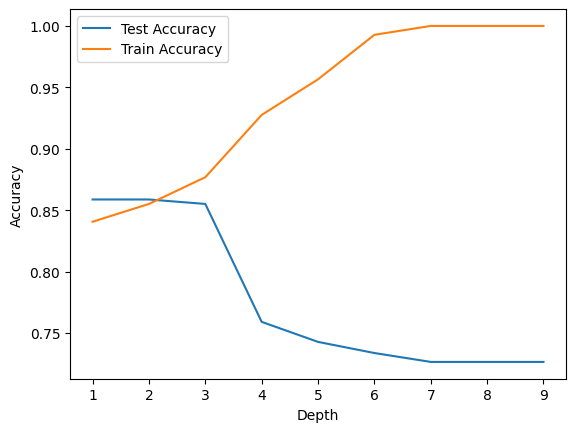

In [13]:
train_acc=[]
test_acc=[]
list_score=[]
p=[]


##Decision Tree Classifier
for i in range (1, 10):
    classifer = DecisionTreeClassifier(max_depth= i, random_state= 0 )
    classifer.fit(rescaledX_train, y_train)

    train_pred = classifer.predict(rescaledX_train)
    test_pred = classifer.predict(rescaledX_test)

    test_acc = accuracy_score(y_test, test_pred)
    train_acc = accuracy_score(y_train, train_pred)
    print(i, "Train score: ", train_acc, 'Test score: ', test_acc)

    list_score.append([i, accuracy_score(train_pred, y_train), accuracy_score(test_pred, y_test)])

df2 = pd.DataFrame(list_score, columns=['Depth', 'Train Accuracy', 'Test Accuracy'])
plt.plot(df2['Depth'], df2['Test Accuracy'], label='Test Accuracy')
plt.plot(df2['Depth'], df2['Train Accuracy'], label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
#plt.show()
##Use the value of 2 for the model, as it scores 85%
##tree should be allowed to split twice

In [14]:
##Log regression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledXTrain = scaler.fit_transform(X_train)
rescaledXTest = scaler.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(rescaledXTrain, y_train)

LogisticRegression()

In [15]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(rescaledXTest)
y_pred1 = logreg.predict(rescaledXTrain)

# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", logreg.score(rescaledXTest,y_test))
print("Train: Accuracy = ", logreg.score(rescaledXTrain,y_train))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Test: Accuracy =  0.8623188405797102
Train: Accuracy =  0.855072463768116
[[267  48]
 [ 28 209]]


In [18]:
##Lets do a grid search to make our preformance better
##Define the grid of values for tol and max_iter 
tol = [0.01, 0.001, 0.0001]
max_iter = [100,150,200]

##Create a dictionary where tol and max_iter are keys 
##and the lists of their values are corresponding values 
param_grid= dict(tol = tol, max_iter = max_iter)

In [19]:
##Conduct GridSearchCV with the required parameters 
grid_model = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5)

##Use scaler to rescale X 
rescaledX = scaler.fit_transform(X)

##Fit data to grid_model 
grid_model_result = grid_model.fit(rescaledX, y)

##Summarize results 
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best %f using %s" % (grid_model_result.best_score_, grid_model_result.best_params_))

Best 0.853623 using {'max_iter': 100, 'tol': 0.01}
